In [1]:
from sqlalchemy import *
import numpy as np
import pylab as plt
import pandas as pd
from peakdetect import peakdetect
from scipy.ndimage.interpolation import shift
import time

%matplotlib inline

In [4]:
engine = create_engine('sqlite+pysqlite:///../d.sql')

In [5]:
import time
start_time = time.time()
RawADCdf = pd.io.sql.read_sql("SELECT * FROM RawADC", engine)
end_time = time.time()
print end_time-start_time

5.56453704834


In [9]:
RawADCdf[RawADCdf['EventID']==0].head()

,ID,EventID,PadNum,t0,t1,t2,t3,t4,t5,t6,...,t502,t503,t504,t505,t506,t507,t508,t509,t510,t511
0,1,0,97,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100,101,0,158,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
200,201,0,161,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
300,301,0,95,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
400,401,0,98,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [106]:
t = RawADCdf[RawADCdf['EventID']==0]
t[t['PadNum']<0]

,ID,EventID,PadNum,t0,t1,t2,t3,t4,t5,t6,...,t502,t503,t504,t505,t506,t507,t508,t509,t510,t511
1100,1101,0,-11,270,359,358,352,355,358,352,...,361,366,365,363,360,367,357,359,363,381
2200,2201,0,-22,198,282,281,280,279,281,280,...,286,288,288,286,290,290,285,289,294,306
4500,4501,0,-45,257,337,340,345,339,346,347,...,353,357,349,351,352,350,349,353,340,371
5600,5601,0,-56,274,364,361,360,361,365,363,...,366,365,366,370,370,368,359,370,361,384
7800,7801,0,-11,209,292,292,294,296,291,293,...,296,297,297,297,299,296,287,303,303,301
8900,8901,0,-22,196,271,265,266,266,269,269,...,272,273,274,272,271,272,264,279,279,275
11100,11101,0,-45,182,257,254,254,252,256,256,...,259,262,259,263,262,259,260,262,272,266
12200,12201,0,-56,161,234,234,235,232,232,236,...,239,240,239,239,241,239,236,242,248,245
14500,14501,0,-11,226,307,303,306,307,307,307,...,310,312,312,313,311,312,299,315,320,316
15600,15601,0,-22,274,356,351,352,355,354,353,...,356,358,361,356,358,357,347,361,363,360


Axes(0.125,0.125;0.775x0.755)


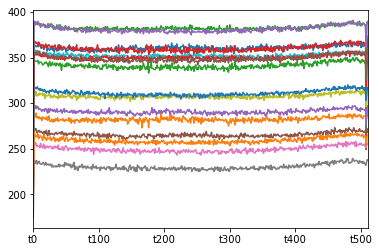

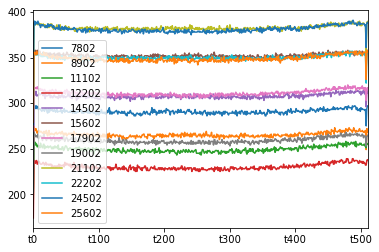

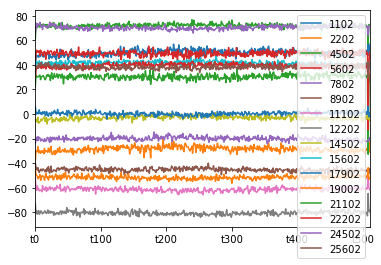

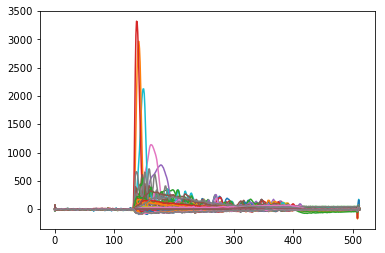

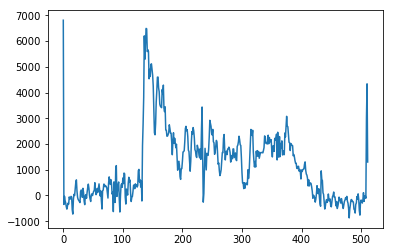

In [200]:
EID=2
tmp = RawADCdf[RawADCdf['EventID']==EID].copy()
tmp1 = tmp[tmp['PadNum']<0].iloc[:,3:].T.plot(legend=None)
plt.figure()
mean = tmp[tmp['PadNum']<0].iloc[:,3:].mean(axis=0)
FPN = tmp[tmp['PadNum']<0].iloc[:,3:]

print FPN[np.std(FPN-mean,axis=1)<2].T.plot()

mean = FPN[np.std(FPN-mean,axis=1)<2].mean(axis=0)
plt.figure()

(tmp[tmp['PadNum']<0].iloc[:,3:]-mean).T.plot()






plt.figure()
tmp.iloc[:,3:] = (tmp.iloc[:,3:] - mean)
plt.plot((tmp.iloc[:,3:].values - tmp.iloc[:,10:60].mean(axis=1).values[:,None]).T);
plt.figure()
matrix = (tmp.iloc[:,3:].values - tmp.iloc[:,10:60].mean(axis=1).values[:,None])
plt.plot(np.sum((matrix*(matrix>-330)),axis=0));
          
#plt.plot(np.sum(),axis=0))
#RawADCdf[(RawADCdf['EventID']==0].iloc[200:250].T.plot(legend=None)

In [174]:
def Process(df):
    Tr = df[(df.iloc[:,3:].sum(axis=1).abs()>100)&(df['PadNum']>0)].copy()
    FPN = df[df['PadNum']<0].iloc[:,3:]
    Tr.iloc[:,3:] = Tr.iloc[:,3:] -mean

    Tr.iloc[:,3:] = Tr.iloc[:,3:].subtract(Tr.iloc[:,10:60].mean(axis=1),axis=0)
    return Tr

start_time = time.time()
ADCdf = RawADCdf.groupby('EventID').apply(Process)
ADCdf.reset_index(drop=True)
end_time = time.time()
print end_time-start_time

,ID,EventID,PadNum,t0,t1,t2,t3,t4,t5,t6,...,t502,t503,t504,t505,t506,t507,t508,t509,t510,t511
0,2,1,97,-25.826667,-3.16,2.923333,3.423333,1.34,0.423333,1.423333,...,-0.41,3.756667,3.006667,9.673333,1.756667,1.09,31.256667,31.84,62.84,31.84
1,102,1,158,-25.866667,0.80,2.883333,-0.616667,1.30,2.383333,2.383333,...,-0.45,-2.283333,-6.033333,3.633333,1.716667,4.05,37.216667,35.80,65.80,34.80
2,202,1,161,-26.046667,-3.38,-1.296667,-0.796667,0.12,-1.796667,6.203333,...,-7.63,2.536667,0.786667,5.453333,2.536667,5.87,35.036667,36.62,69.62,34.62
3,302,1,95,-23.306667,-1.64,2.443333,2.943333,3.86,0.943333,1.943333,...,2.11,6.276667,1.526667,4.193333,-0.723333,6.61,36.776667,38.36,65.36,28.36
4,402,1,98,-17.786667,-1.12,3.963333,4.463333,1.38,4.463333,-0.536667,...,-3.37,-2.203333,-7.953333,-4.286667,-2.203333,-4.87,28.296667,40.88,66.88,30.88
5,502,1,159,-19.986667,-2.32,-1.236667,-2.736667,2.18,1.263333,4.263333,...,-7.57,-0.403333,-3.153333,6.513333,-2.403333,-0.07,34.096667,37.68,70.68,32.68
6,602,1,162,-22.066667,-7.40,-1.316667,-2.816667,-0.90,-1.816667,-0.816667,...,-2.65,-0.483333,-7.233333,0.433333,-1.483333,10.85,41.016667,42.60,70.60,32.60
7,702,1,96,-19.746667,-8.08,0.003333,6.503333,9.42,4.503333,3.503333,...,-5.33,-3.163333,-2.913333,4.753333,1.836667,4.17,33.336667,34.92,64.92,32.92
8,1002,1,101,-14.166667,-4.50,-1.416667,-0.916667,-2.00,-0.916667,-3.916667,...,0.25,2.416667,1.666667,-0.666667,1.416667,1.75,29.916667,7.50,6.50,12.50
9,1302,1,102,-13.246667,-0.58,-0.496667,-1.996667,-0.08,1.003333,1.003333,...,-3.83,1.336667,-3.413333,-1.746667,-6.663333,5.67,30.836667,42.42,78.42,37.42


In [210]:
def Process(Event):
    mesh = Event.iloc[:,3:][Event.iloc[:,3:]>-200000].sum(axis=0)
    #print mesh
    return mesh
start_time = time.time()
mesh_df = ADCdf.groupby('EventID').apply(Process)
end_time = time.time()
print end_time-start_time

0.466984033585


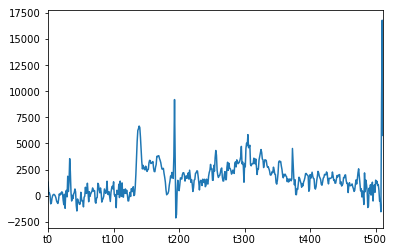

In [211]:
mesh_df.iloc[3].T.plot()

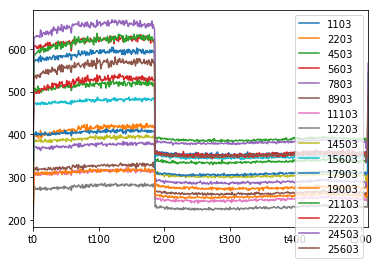

In [212]:
RawADCdf[(RawADCdf['PadNum']<0)&(RawADCdf['EventID']==3)].iloc[:,3:].T.plot()

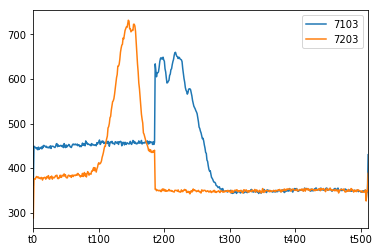

In [225]:
RawADCdf[(RawADCdf['PadNum']>0)&(RawADCdf['EventID']==3)].iloc[67:69,3:].T.plot()